In [19]:
# ejecuta caso 3
print('caso 3')

caso 3


In [3]:
# importando la api de statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
df = pd.read_csv('C:/Users/Lenovo/Programacion/Python/BBDD/Simul.csv')
print(df[:3])

          Y        Y1        Y2        Y3         Y4        Y5        Y6  \
0  2.298704 -2.882500  6.560133 -3.342531 -18.681190  1.566716  2.839575   
1  6.371003 -2.329862  6.149235 -3.827409 -14.458870  1.232620  0.560095   
2  8.664033 -0.558244  7.563736  0.667583  -5.830734  0.902619  2.357468   

         Y7        Y8        Y9  
0  42.71518  0.472623 -3.284886  
1  43.38689  1.796142 -2.929823  
2  42.38133  1.937842 -3.015838  


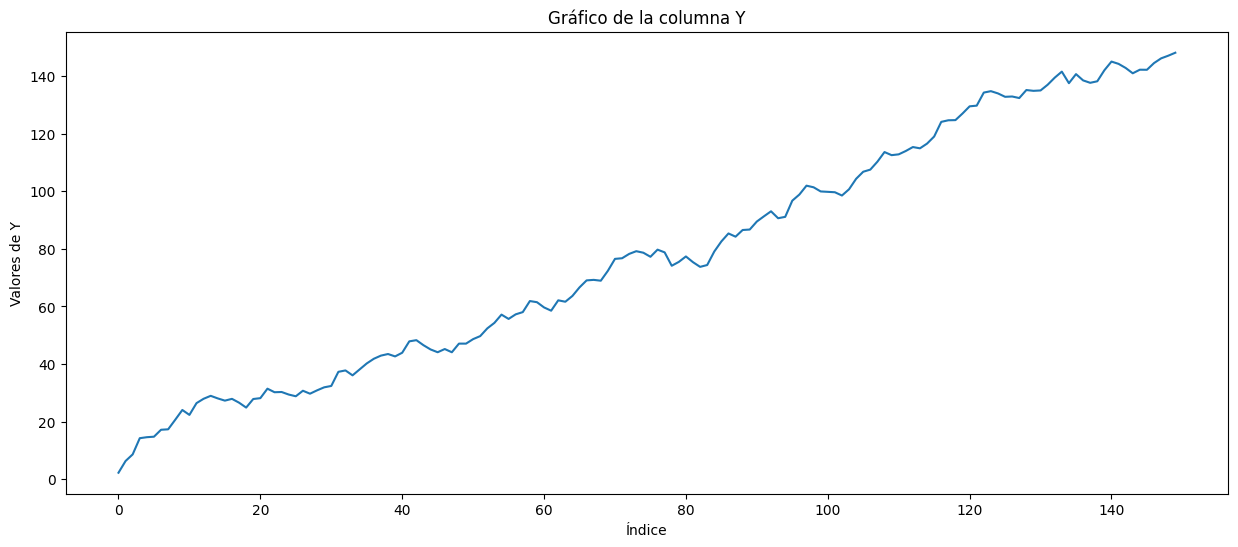

In [13]:
# visualización de datos usando matplotlib
import matplotlib.pyplot as plt

# Trazar la columna 'Y' del DataFrame
plt.figure(figsize=(15, 6))
plt.plot(df['Y'], label='Y')  # Etiqueta opcional
plt.xlabel('Índice')  # Etiqueta del eje X
plt.ylabel('Valores de Y')  # Etiqueta del eje Y
plt.title('Gráfico de la columna Y')  # Título del gráfico
plt.show()

No es estacionario, ya que es creciente

In [14]:
# prueba de Dickey-Fuller Aumentada (ADF) para analizar la estacionaridad
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Y'].dropna())
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]:.6f}')

ADF Statistic: -0.713221
p-value: 0.843295


No se puede rechar ya que el P-value es mayor a 0.05 - La serie no es estacionaria.

Hipotesis = No es Estacionario

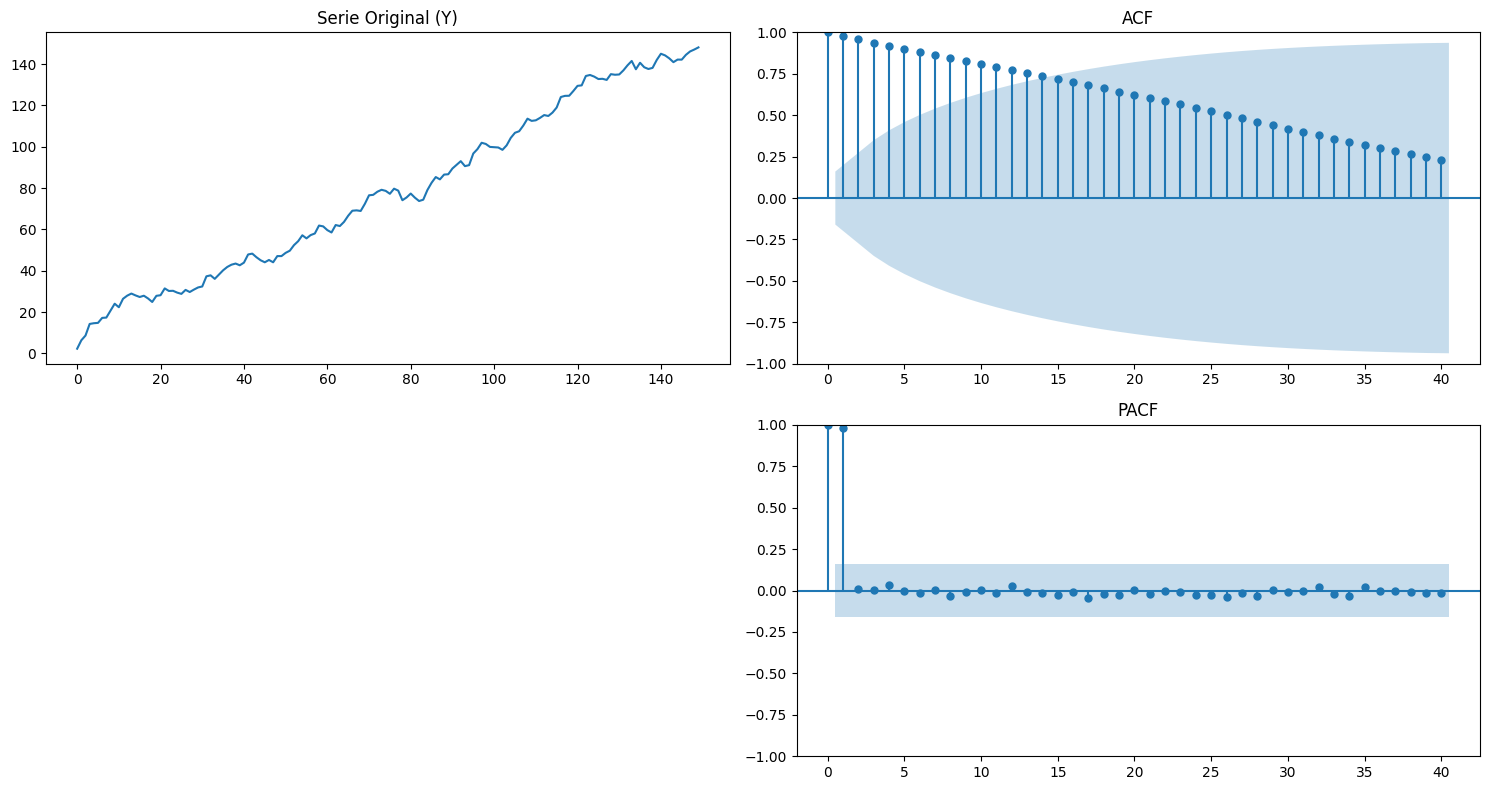

In [15]:
#acf y pcf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear una figura con subplots compartidos para ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Gráfico de la serie original
axes[0, 0].plot(df.Y)
axes[0, 0].set_title('Serie Original (Y)')

# ACF (Función de Autocorrelación)
plot_acf(df.Y, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF')

# PACF (Función de Autocorrelación Parcial)
plot_pacf(df.Y, ax=axes[1, 1], lags=40)
axes[1, 1].set_title('PACF')

# Quitar gráficos vacíos
fig.delaxes(axes[1, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

- ACF = FACT
- PACF = FACP

- ACF = decrece lento
- PACF = Hay un parametro cerca de 1

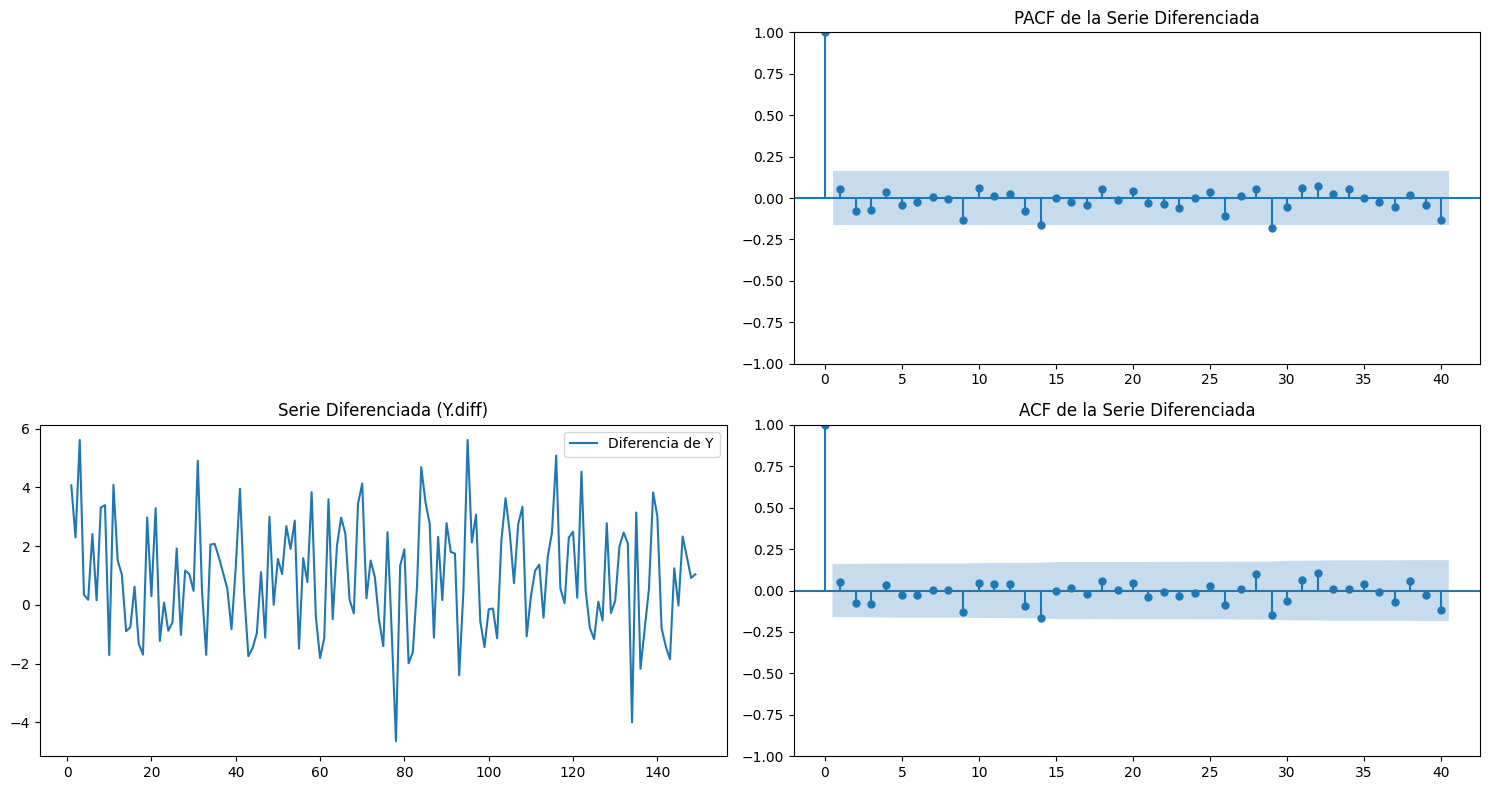

In [23]:
#acf y pcf  
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar la diferencia de la serie original, ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Gráfico de la serie diferenciada
axes[1, 0].plot(df.Y.diff(), label='Diferencia de Y')
axes[1, 0].set_title('Serie Diferenciada (Y.diff)')
axes[1, 0].legend()

# PACF de la serie diferenciada
plot_pacf(df.Y.diff().dropna(), ax=axes[0, 1], lags=40)
axes[0, 1].set_title('PACF de la Serie Diferenciada')


# ACF de la serie diferenciada
plot_acf(df.Y.diff().dropna(), ax=axes[1, 1], lags=40)
axes[1, 1].set_title('ACF de la Serie Diferenciada')


# Quitar gráfico vacío
fig.delaxes(axes[0, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Como no se diferencia nada en el ACF diferenciado, nada supera la zona azul, por lo tanto es rudio blanco ya que en esta parte elimanamos Yt-Yt-1

In [27]:
# Prueba nuevo ADF e impresión directa de los resultados
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Y.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])


ADF Statistic: -11.570800
p-value:0.000000


Volvemos a relaizar el modelo de dikey-fuller y nos da un p-value = 0, si llegado el casoa tener un valor mayor a 0.05 nos indicaria que falta diferenciarlo de nuevo una segunda vez.

- modelo_y = ARIMA(df.Y, order=(0, 1, 0))  
- 0 = p 
- 1 = Numero de diferencias
- 0 = q

In [28]:
#resultados del modelo ARIMA(0, 1, 0)
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y, order=(0, 1, 0))  
resultados = modelo_y.fit() 
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  150
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -326.917
Date:                Mon, 09 Sep 2024   AIC                            655.833
Time:                        16:24:04   BIC                            658.837
Sample:                             0   HQIC                           657.054
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.7128      0.579      8.140      0.000       3.578       5.848
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.52   Pr

1. *L-jung-Box* = No rechazar el contraste, porque la hipotesis nula de este modelo es que los residuos son ruido blanco.
2. *Prob (Q)* = debe ser >0.05 para que no se rechace la hipotesis. Cumple que los residos son ruido blanco ya que en este utima parte la hipotesis es que es ruido blanco

In [29]:
# Realizar el test de Ljung-Box para los residuos del modelo ARIMA
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,5.128146,0.882455


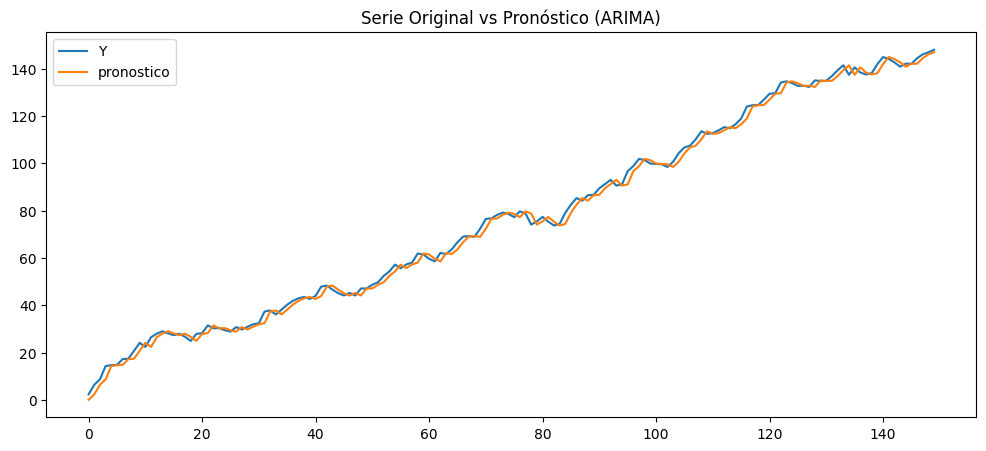

In [30]:
#predicción:  Agregar los valores ajustados y graficar
df['pronostico'] = resultados.fittedvalues
df[['Y', 'pronostico']].plot(figsize=(12, 5), title="Serie Original vs Pronóstico (ARIMA)")
plt.show()


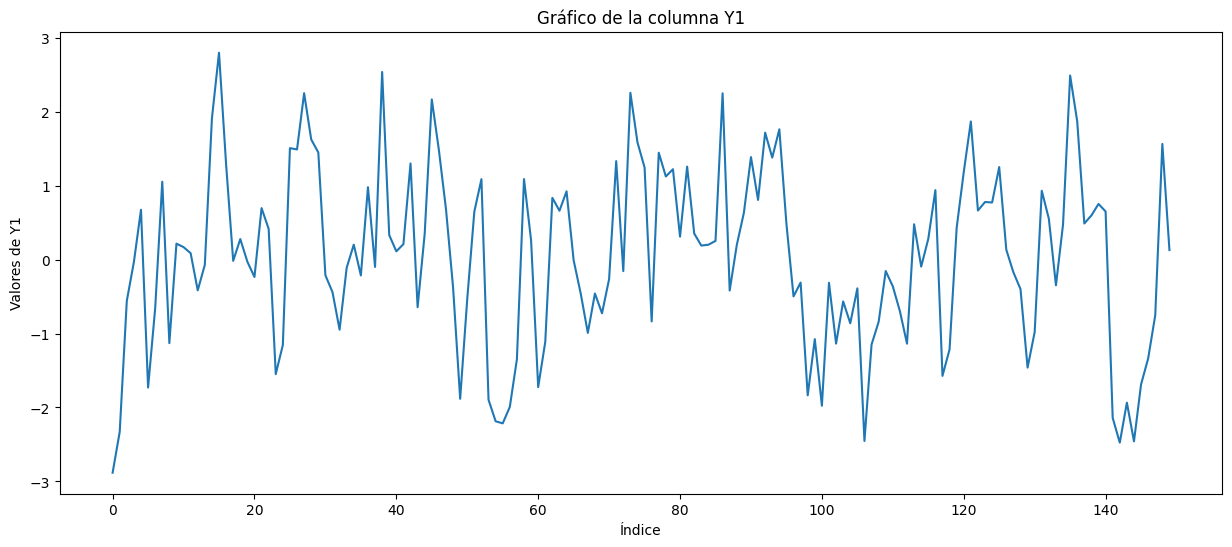

In [31]:
# Graficar la columna Y1
plt.figure(figsize=(15, 6))
plt.plot(df['Y1'])
plt.title("Gráfico de la columna Y1")
plt.xlabel("Índice")
plt.ylabel("Valores de Y1")
plt.show()


In [32]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y1.dropna())
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]:.6f}')

ADF Statistic: -7.104006
p-value: 0.000000


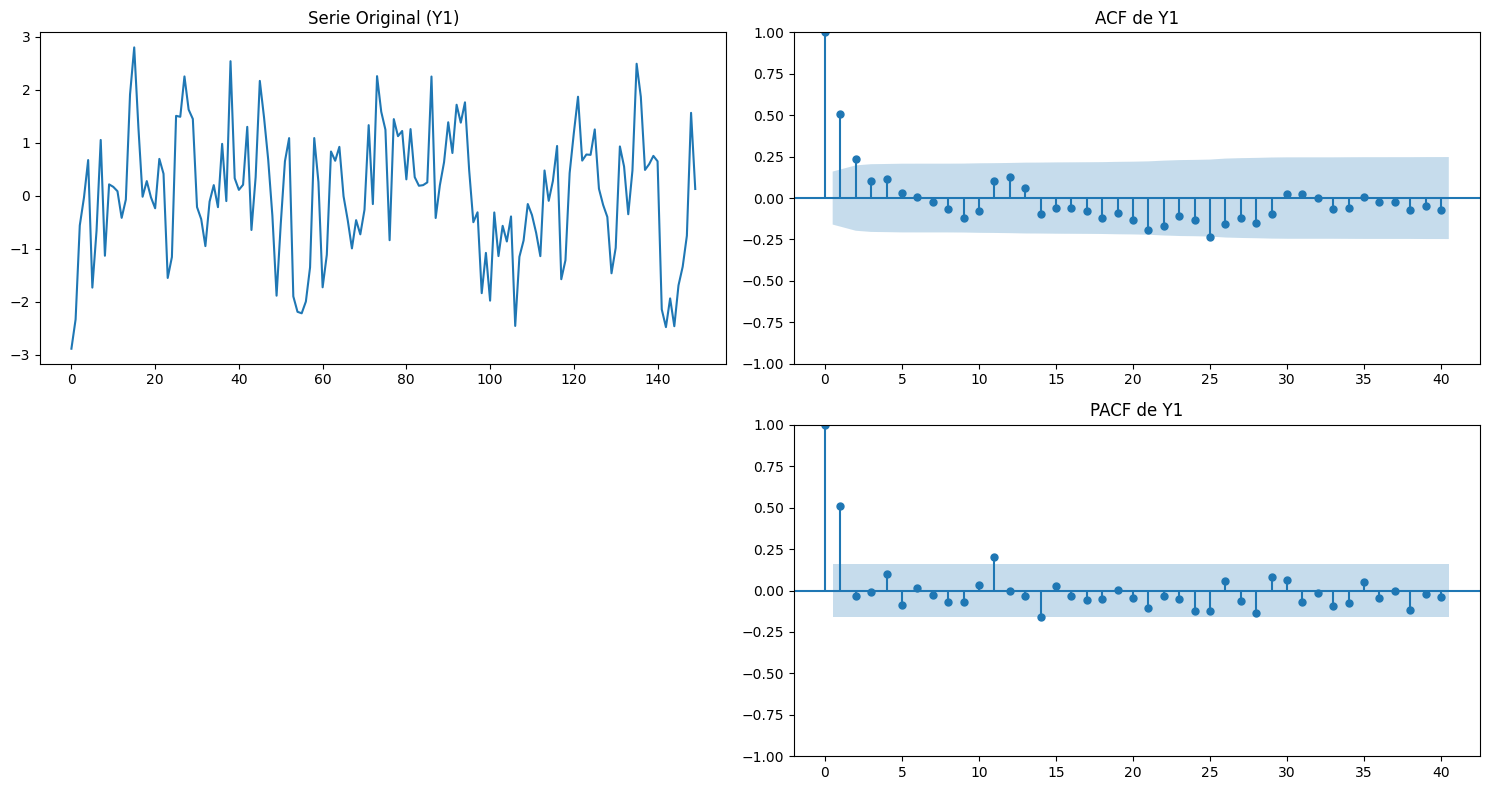

In [33]:
#acf y pcf

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear una figura para ACF y PACF 
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Graficar la serie original
axes[0, 0].plot(df.Y1)
axes[0, 0].set_title('Serie Original (Y1)')

# Graficar ACF
plot_acf(df.Y1, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF de Y1')

# Graficar PACF
plot_pacf(df.Y1, ax=axes[1, 1], lags=40)
axes[1, 1].set_title('PACF de Y1')

# Quitar gráfico vacío
fig.delaxes(axes[1, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Es un modelo AR, ya que ACF (FACT) decrece rapido ya que depsues del segundo valor ya no se puede ver nada (Zona Azul).
y en PACF (FACP) tenemos un valor significativo 

In [34]:
#arima model (1,0,0)
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y1, order=(1, 0, 0))  
resultados = modelo_y.fit() 
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y1   No. Observations:                  150
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -217.640
Date:                Mon, 09 Sep 2024   AIC                            441.280
Time:                        16:24:11   BIC                            450.312
Sample:                             0   HQIC                           444.949
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0228      0.171      0.133      0.894      -0.313       0.358
ar.L1          0.5266      0.080      6.589      0.000       0.370       0.683
sigma2         1.0638      0.122      8.715      0.0

 ro = ar.l1 = estimacion de AR de orden 1
1. *L-jung-Box* = No rechazar el contraste, porque la hipotesis nula de este modelo es que los residuos son ruido blanco.
2. *Prob (Q)* = debe ser >0.05 para que no se rechace la hipotesis. Cumple que los residos son ruido blanco ya que en este utima parte la hipotesis es que es ruido blanco

In [35]:
# Realizar el test de Ljung-Box para los residuos del modelo ARIMA
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)



,lb_stat,lb_pvalue
10,7.200881,0.706354


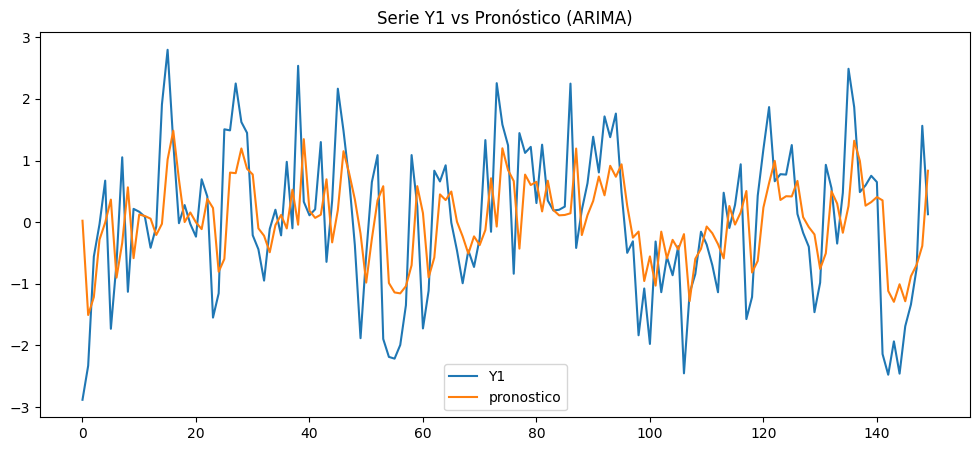

In [36]:
#predicción:  Agregar los valores ajustados y graficar
df['pronostico'] = resultados.fittedvalues
df[['Y1', 'pronostico']].plot(figsize=(12, 5), title="Serie Y1 vs Pronóstico (ARIMA)")
plt.show()

---------------------------

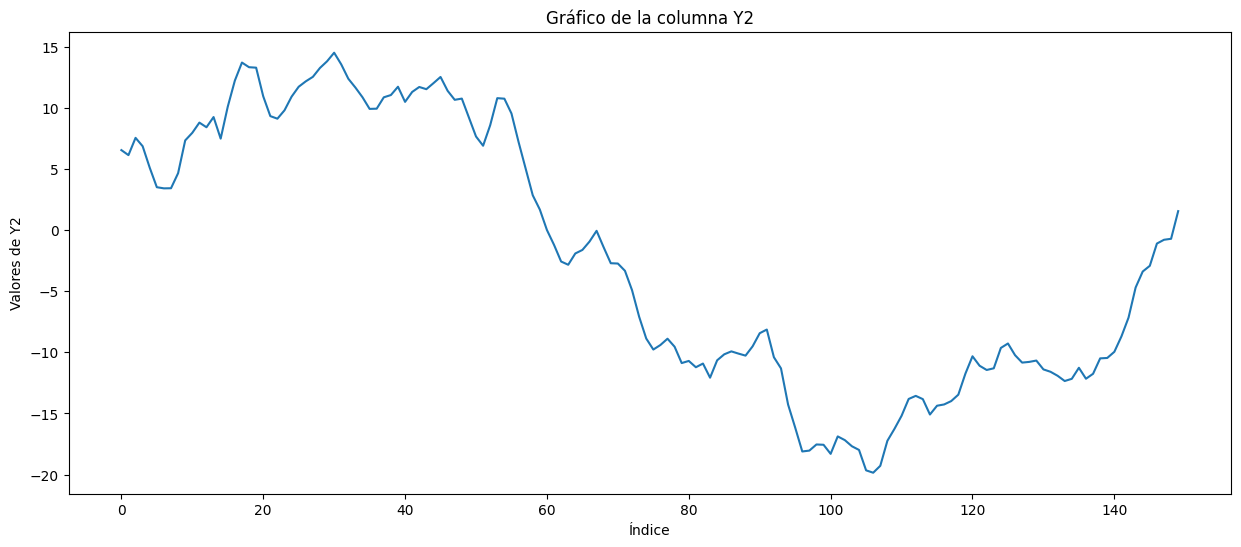

In [16]:
# Graficar la columna Y2
plt.figure(figsize=(15, 6))
plt.plot(df['Y2'])
plt.title("Gráfico de la columna Y2")
plt.xlabel("Índice")
plt.ylabel("Valores de Y2")
plt.show()

In [17]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y2.dropna())
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]:.6f}')

ADF Statistic: -1.150434
p-value: 0.694546


No se puede rechazar que no es estacionaria. Por lo que es  no Estacionaria

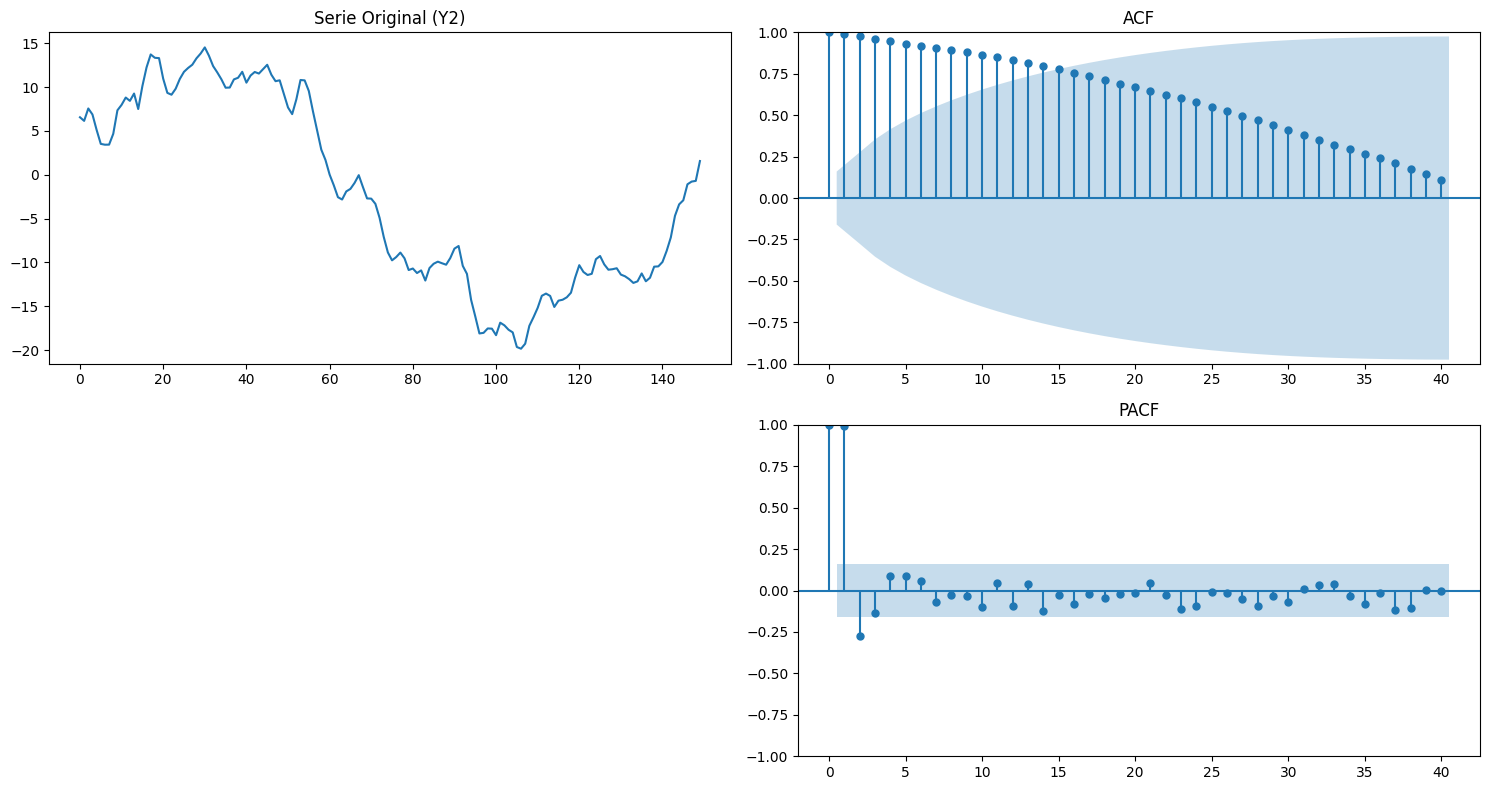

<Figure size 640x480 with 0 Axes>

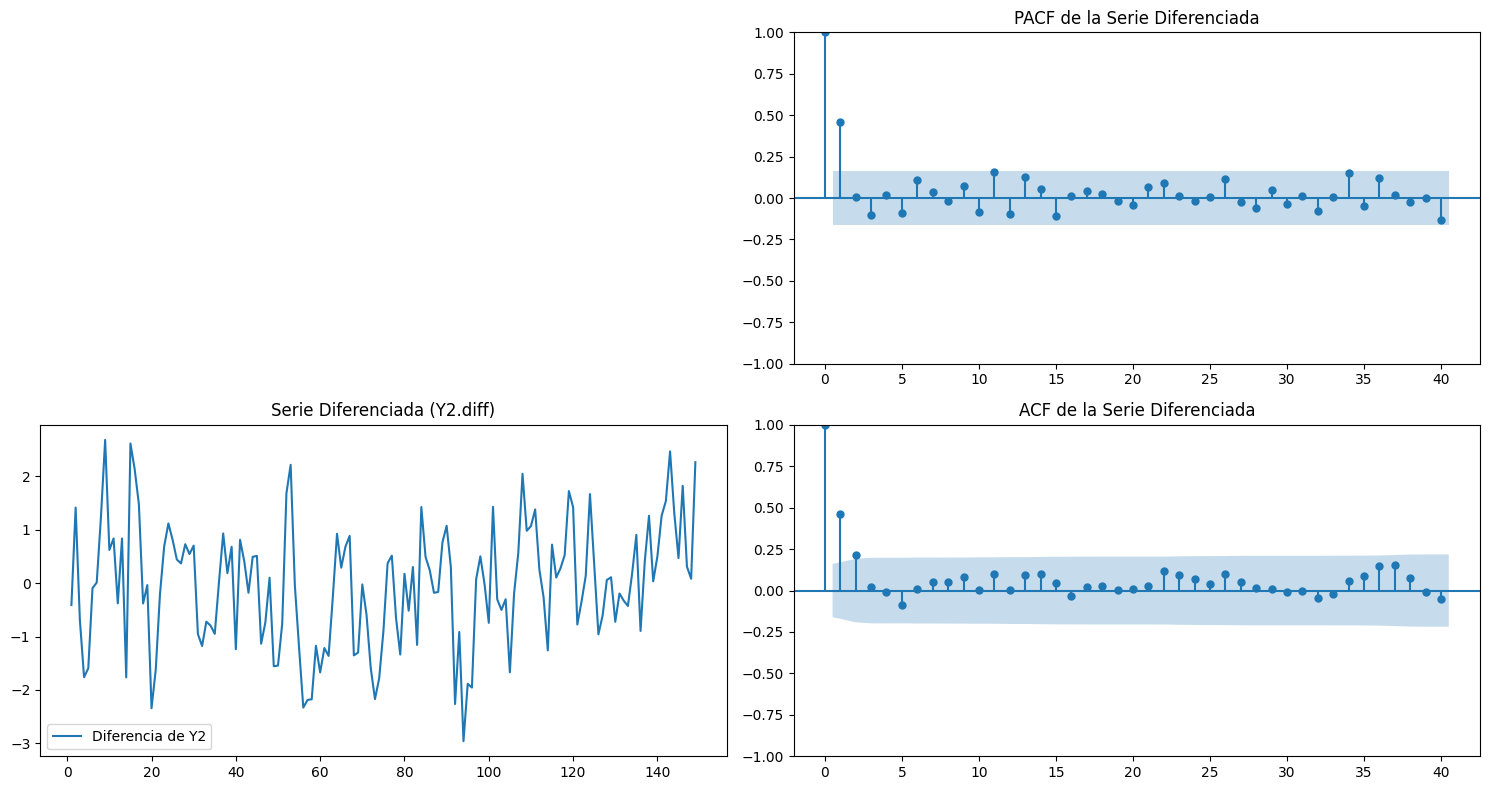

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear una figura con subplots compartidos para ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Gráfico de la serie original
axes[0, 0].plot(df.Y2)
axes[0, 0].set_title('Serie Original (Y2)')

# ACF (Función de Autocorrelación)
plot_acf(df.Y2, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF')

# PACF (Función de Autocorrelación Parcial)
plot_pacf(df.Y2, ax=axes[1, 1], lags=40)
axes[1, 1].set_title('PACF')

# Quitar gráficos vacíos
fig.delaxes(axes[1, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Ajustar la distribución
plt.tight_layout()
plt.show()

# Graficar la diferencia de la serie original, ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Gráfico de la serie diferenciada
axes[1, 0].plot(df.Y2.diff(), label='Diferencia de Y2')
axes[1, 0].set_title('Serie Diferenciada (Y2.diff)')
axes[1, 0].legend()


# PACF de la serie diferenciada
plot_pacf(df.Y2.diff().dropna(), ax=axes[0, 1], lags=40)
axes[0, 1].set_title('PACF de la Serie Diferenciada')

# ACF de la serie diferenciada
plot_acf(df.Y2.diff().dropna(), ax=axes[1, 1], lags=40)
axes[1, 1].set_title('ACF de la Serie Diferenciada')

# Quitar gráfico vacío
fig.delaxes(axes[0, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()




In [40]:
#nuevo df Y2
result=adfuller(df.Y2.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])



ADF Statistic: -7.101717
p-value:0.000000


In [41]:
#arima model (1,0,0)
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y2, order=(1, 0, 0))  
resultados = modelo_y.fit() 
print (resultados.summary())


                               SARIMAX Results                                
Dep. Variable:                     Y2   No. Observations:                  150
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -234.807
Date:                Mon, 09 Sep 2024   AIC                            475.614
Time:                        16:24:22   BIC                            484.646
Sample:                             0   HQIC                           479.284
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5962      9.873      0.162      0.872     -17.755      20.947
ar.L1          0.9916      0.009    106.568      0.000       0.973       1.010
sigma2         1.3042      0.165      7.910      0.0

In [42]:
# Realizar el test de Ljung-Box para los residuos del modelo ARIMA
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)


,lb_stat,lb_pvalue
10,39.616187,0.00002


In [43]:
#arima model (1, 1, 0)
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y2, order=(1, 1, 0))  
resultados = modelo_y.fit() 
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y2   No. Observations:                  150
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -213.489
Date:                Mon, 09 Sep 2024   AIC                            430.978
Time:                        16:24:26   BIC                            436.986
Sample:                             0   HQIC                           433.419
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4707      0.079      5.987      0.000       0.317       0.625
sigma2         1.0264      0.115      8.914      0.000       0.801       1.252
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [44]:
# Realizar el test de Ljung-Box para los residuos del modelo ARIMA
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,12.577931,0.248236


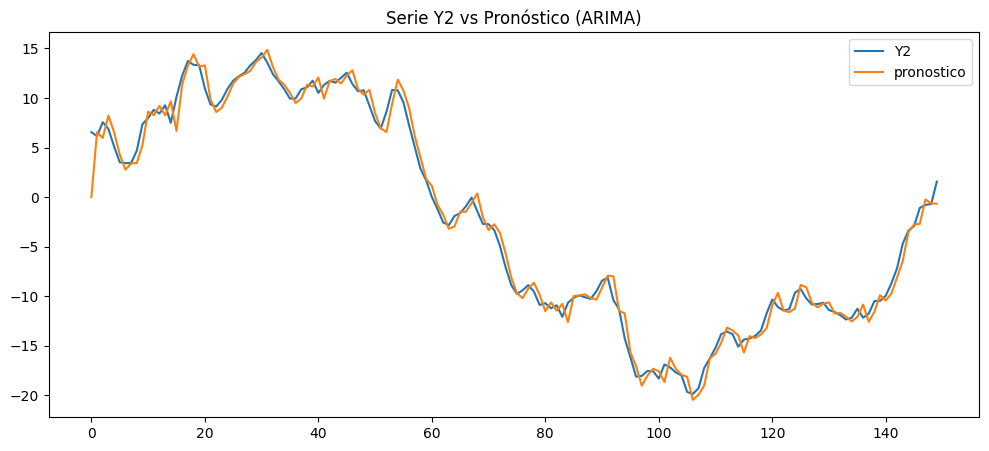

In [45]:
#predicción:  Agregar los valores ajustados y graficar
df['pronostico'] = resultados.fittedvalues
df[['Y2', 'pronostico']].plot(figsize=(12, 5), title="Serie Y2 vs Pronóstico (ARIMA)")
plt.show()